# CS 237 Spring 2021, HW 08 

#### Due date: Friday April 2st at Midnight (1 minute after 11:59pm on 4/1) via Gradescope (6 hour grace period).  No hws will be accepted after 6am on Saturday. 

#### As posted on Piazza, late period is waived, you have until this deadline to submit with no late points. 

 

#### General Instructions

Please complete this notebook by filling in solutions where indicated. 

For full credit, please take careful note of the following requirements:

- Do NOT use any HTML tags in your notebook, as Gradescope will ignore them;

- Do NOT answer questions by including images, as Gradescope will ignore them; and 

- You MUST  "Restart and Run All" from the Kernel menu before submitting to Gradescope.

**Any assignments which do not follow these requirements will not receive full credit.** 



There are 8 analytical problems and 2 programming problems. This homework is worth the same as every other homework, namely 60 points, so each problem is worth 6 points. An introductory video will be posted on YT for
the analytical problems, and the programming problems will be covered Friday in lab. 

In [251]:
# Here are some imports which will be used in code that we write for CS 237
 

# Imports potentially used for this lab


import matplotlib.pyplot as plt   # normal plotting
import numpy as np

from math import log, pi,log,floor       # import whatever you want from math
from random import seed, random
from scipy.special import comb
from collections import Counter
from numpy.random import seed, random, randint, choice, shuffle

%matplotlib inline

# Calculating permutations and combinations efficiently

def P(N,K):
    res = 1
    for i in range(K):
        res *= N
        N = N - 1
    return res
           
def C(N,K):    
    return comb(N,K,True)     # just a wrapper around the scipy function


# Useful code 

def show_distribution(outcomes, title='Probability Distribution'):
    num_trials = len(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()

# This function takes the range and PMF of a discrete RV and draws the distribution.  

def draw_distribution(Rx, fx, title='Probability Distribution for X'):
    plt.bar(Rx,fx,width=1.0,edgecolor='black')
    plt.ylabel("Probability")
    plt.xlabel("Outcomes")
    if (Rx[-1] - Rx[0] < 30):
        ticks = range(Rx[0],Rx[-1]+1)
        plt.xticks(ticks, ticks)  
    plt.title(title)
    plt.show()
    
def round4(x):
    return round(x+0.00000000001,4)

def round4_list(L):
    return [ round4(x) for x in L]




## Analytical Problem Instructions

The Problem 3 asks you to "describe" a random variable, which means:

> (i)   Give $R_X$ (you may schematize it if it is very complicated or infinite);<br>
> (ii)  List out the values of $f_X$ corresponding to each element of $R_X$; <br>
> (iii)  Draw a probability distribution, using the function <code>draw_distribution</code> provided in the previous cell. <br>

As always, round to 4 decimal places <strong>at the last stage</strong>, using the functions <code>round4(...)</code> and <code>round4_list(...)</code> given above.

A nice way to approach these is to do any complicated calculations in Python and then if you have
to change something you won't have to redo all the calculations. Plus, you will make fewer
mistakes in calculation. However, there is no need to do this for simpler problems. 

##  Problem One

Do problem 14 from the end-of-chapter problems for Chapter 3:

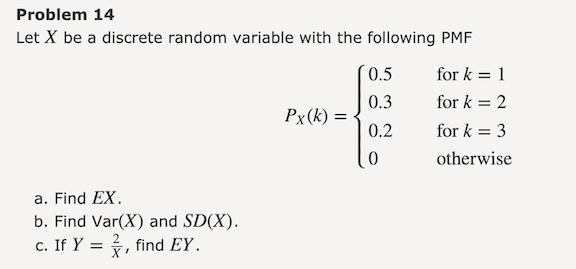

Note that $EX$ = $E(X)$ (some books use this odd notation). 

**Solution:**


    A.) Find E(X):
    
             E(X) = (0.5 * 1) + (0.3 * 2) + (0.2 * 3) = 1.7
    
    B.) Find Var(X) and SD(X):
    
             Var(X) = E(X^2) - E(X)^2
                    
             First we have to find E(X^2) and E(X)^2
             
             E(X)^2 = (1.7)^2 = 2.89
             
             E(X^2) = (0.5 * (1^2)) + (0.3 * (2^2)) + (0.2 * (3^2)) = 3.5
             
             Var(X) = E(X^2) - E(X)^2 = 3.5 - 2.89 = 0.61
             
             
             SD(X) = Square root of (Var(X))
                   = Square root of (0.61)
                   = 0.7810
                   
    C.) Find E(Y):
    
            E(X) = (0.5 * (2/1)) + (0.3 * (2/2)) + (0.2 * (2/3)) = 1.43
         








## Problem Two

Let $X\sim \text{Geo}(1/3)$ and let $Y = |X-5|$. Compute the following


(A) $R_Y$

(B) $f_Y$ (the PMF)

(B) $E(Y)$

(D) $Var(Y)$

(E) $\sigma_Y$ (standard deviation of $Y$)


NOTE:  It is WAY complicated to do this analytically,
so you should do it with Python.  Write fx and fy as functions in Python, and then give the first 10 values in the PMF for part B, and for the remaining parts, calculate the values
experimentally, using the first 100 values in the range (which will give you an answer
which is as accurate as can be represented with a float).


**Solution:**

    A.)
        𝑅𝑌 = {0,1,2,3,4,5,6,7....n}
    B.)
        PMF:
        
        (1/3) * (2/3)^n-y * (1 + (2/3)^2y)    when y = 0,1,2,3, 4
        (1/3) * (2/3)^n+y                     when y => 5
        
    C.)
    
        E(Y) = 2.2715
    
    D.)
    
        Var(Y) = 22.6183
    
    E.)
        Var(Y) = 22.6183
        square root of Var(Y) = 4.755
        
        𝜎𝑌 = 4.755


##  Problem Three

A sack contains five balls, two of which are marked $\$1$,   two $\$2$, and one $\$10$. One round of the game is played as follows: You pay me $\$5$ to select two balls at random (without replacement) from the urn, at which point I pay you the sum of the amounts marked on the two balls. Suppose we define the "net payout" as the amount you win minus the cost of each round. </p>

(A) *Describe* the random variable X = "the net payout one round" (as in HW 07).

(B) Calculate $E(X)$, showing all work.  

(C) Is this a fair game, given that you pay \$5 for each round? If not,  what should I charge you for each round to make it a fair game?



**Solution:**

    A.)
        All the Possibilities:
        
        1 + 1 = 2 ------- P = 1/10 = 0.1                 Lost 3 bucks
        1 + 2 = 3 ------- P = 2*2 / 10 = 0.4             Lost 2 bucks
        1 + 10 = 11 ----- P = 2/ 10 = 0.2                Gained 6 bucks
        2 + 2 = 4,------- P = 1/ 10 = 0.1                Lost 1 buck
        2 + 10 = 12 ----- P = 2 / 10 = 0.2               Gained 7 bucks
        
        DISTRIBUTION:
        
        P(X = -3) = 0.1,
        P(X = -2) = 0.4,
        P(X = -1) = 0.1,
        P(X = 6) = 0.2,
        P(X = 7) = 0.2
        
    B.)
    
        E(X) = (-3*0.1) + (-2*0.4) + (-1*0.1) + (6*0.2) + (7*0.2)
             = 1.4
    
    C.)
    
        It's not fair because E(X) is 1.4 that means we will probabily profit. Thus to make it fair, we have to ensure that the expected value is 0. So we just add 1.4 to 5.
        
        1.4 + 5 = 6.4



## Problem Four

Wayne and Richard are throwing darts at a target, and Wayne's probability of hitting the bullseye is $p$ and Richard's probability of hitting it is $q$ (independently of Wayne). A <i> round </i> of the game is for Richard to throw and then Wayne to throw. The game is to keep throwing until <b>both</b> of them hit the bulleye <b>on the same round</b> and then stop. 

(A) If $X$ = the number of rounds until the game stops, what is the distribution of $X$?

(B) What is the probability that the game stops on the $k^{th}$ round?

(C) What is the probability that Richard first hits the target in the 4th round, but Wayne has not yet hit the target by the 4th round?

(D) Suppose after 10 rounds (and no round where both have hit the target) they decide to change the rules and continue to play until at least one of them hits the target. How many more rounds would they expect to play on average?

You must express your answers in terms of the parameters $p$ and $q$ (and $k$ for (B)). 

**Solution:**

    A.)
        P = Wayne's probability of hitting the bullseye
        Q = Richard's probability of hitting the bullseye
        
        PQ is the probability they both hit it
        
        (1 - PQ) is the probability they both don't hit it, thus the game continues
        
        Thus,
        
        f(x) = ((1 - PQ)^x-1) * (PQ)
        
    B.)
        The probability that the game stops on the 𝑘𝑡ℎ round:
        
        f(X = k) = ((1 - PQ)^k-1) * (PQ)
        
    C.)

        (1 - P)^3 = First 3 rounds Wayne don't hit target
        (1 - Q)^3 = First 3 rounds Richard don't hit target
        
        ANSWER: (1 - P)^3   *  (1 - Q)^3  *  Q(1 - P)
    
    D.)
        (1 - P) * (1 - Q) is the probability that Richard and Wayne both don't hit their targets, so probability that no one hits their target
        
        Thus,
        
        1 - ( (1-P)*(1-Q) ) is the probability at least one of them hits
        
        = 1 - (1 - P - Q + PQ)
        
        = 1 - 1 + P + Q - PQ
        
        = P + Q - PQ
        
        
        
        ANSWER: 1 / (P + Q - PQ)
        
        

## Problem Five

Wayne frequents a coffee shop which gives each customer who buys a coffee a 
coupon labelled with one of the numbers 1, 2, 3, or 4; when a customer collects coupons with all four numbers, he or she
may trade them in for a free coffee. The coffee shop does not keep track
of which coupons are given to which customers, and so the shop effectively picks
a coupon with replacement from the set of 4 coupons. 
  

(A) Suppose Wayne has not yet received coupon $i\in\{1,2,3,4\}$. Let $X$ = "the number of visits until he receives coupon $i$."
What is the distribution of $X$?  What is $E(X)$?  Be precise and give all relevant parameters.

(B) Suppose Wayne has received one coupon $i\in\{1,2,3,4\}$ (say, after his first visit). Let $X_2$ = "the number of visits until he receives a new coupon (i.e., $j\ne i$). 
What is the distribution of $X_2$?  What is $E(X_2)$?  Be precise and give all relevant parameters.

(C) Suppose Wayne has received two coupons $i$ and $j$ from $\{1,2,3,4\}$ with $i\ne j$ after some number of visits. Let $X_3$ = "the number of visits until he receives a new coupon (not equal to $i$ or $j$). 
What is the distribution of $X_3$?  What is $E(X_3)$?  Be precise and give all relevant parameters.

(D) Suppose Wayne has all but one of the coupons (e.g., he has 2, 3, and 4, but is waiting for 1). Let $X_4$ = "the number of visits until he receives the last coupon."
What is the distribution of $X_4$?  Be precise and give all relevant parameters.   

(E) What is the expected number of visits for Wayne to be able to get all four coupons? (Note: this will be a real number.)

Hint: Wayne receives a new coupon with probability 1.0 on the first visit. Use B, C, and D to arrive at your answer to E. 


**Solution:**

    A.)
        𝑋 = "the number of visits until he receives coupon 𝑖
        
        X could be 1, 2, 3, 4 ....
        
        The probability of success each time is  𝑖∈{1,2,3,4} so 1/4
        
        p = 1/4
        
        Thus, 
        
        The distribution of X is:  X ~ Geometric(1/4)
        
        E(X) is:
        
        E(X) = 1/p = 1/(1/4) = 4
    
    B.)
        𝑗≠𝑖
        
        𝑋2 = "the number of visits until he receives a new coupon"
        
        𝑋2 could be 1, 2, 3, 4 ....
        
        The probability of success each time is 3/4
        
        The distribution of X is:  X ~ Geometric(3/4)
        
        E(X) is:
        
        E(X) = 1/p = 1/(3/4) = 4/3
        
    
    C.)
    
         𝑖≠𝑗
    
         𝑋3 = "the number of visits until he receives a new coupon (not equal to 𝑖 or 𝑗)
        
         𝑋3 could be 1, 2, 3, 4 ....
         
        The probability of success each time is 2/4 ~ 1/2
        
        The distribution of X is:  X ~ Geometric(1/2)
        
        E(X) is:
        
        E(X) = 1/p = 1/(1/2) = 2
    
    D.)
    
        𝑋4 = "the number of visits until he receives the last coupon."
        
        X4 could be 1, 2, 3, 4 ....
        
        The probability of success each time is 1/4
        
        p = 1/4
        
        Thus, 
        
        The distribution of X is:  X ~ Geometric(1/4)
        
        E(X) is:
        
        E(X) = 1/p = 1/(1/4) = 4
    
    
    E.) 
    
       Expected for first coupon is just 1 --- can be any coupon
       Expected for second coupon that's different than the first coupon --- 4/3
       Expected for third coupon that's different than first and second coupon --- 2
       Expected for fourth coupon that's different than first and second coupon --- 4
       
       1 + (4/3) + 2 + 4 
       
       = 7 + (4/3) 
       
       = 8.33


## Problem Six

A box contains 20 fuses, of which exactly 5 are defective. 

(A) Suppose
you select 3 fuses randomly, without replacement.

Let $X$ = "the number of defective fuses among the 3 selected."

Give $E(X)$. Show all work for full credit. 

(B) Suppose you choose fuses from the box randomly, without replacement, and test them. 
What is the expected number of fuses you choose until you find a non-defective fuse?

**Solution:**

    A.)
        15 not defective
         5 defective
         
         𝑋 = "the number of defective fuses among the 3 selected."
         
         X    |       0     |        1       |       2         |       3       |
         
                 15C3/20C3    15C2*5C1/20C3     15C1*5C2/20C3     5C3/20C3
         
         P(X) |    0.399    |     0.460      |       0.132      |     0.009    |
         
         E(X) = (0*0.399) + (1*0.460) + (2*0.132) + (3*0.009)
         
              = 0.751
         
    B.) 0.751 * 3 = 2.25
    
        ANSWER: 2.25
        


## Problem Seven

Wayne rolls a fair die until he gets a 2. Richard rolls the same die until he gets an odd number. What is the probability that Richard rolls the die more times than Wayne does?

Hint: Find the probability that Wayne rolls $k$ times and Richard rolls more than $k$ times (remembering that these are independent), and then sum over all possible $k$. 

<strong> Solution: </strong>  

    P(Wayne rolls until he gets a 2) = (5/6)^k-1 * (1/6)
    P(Richard rolls until he gets an odd) = (3/6)^k
    
    Sum over all K:
    
    ∞ Σ k=1      (5/6)^k-1 * (1/6) * (3/6)^k
    
    ∞ Σ k=1      (1/6) * (5/6)^k-1 * (1/2)^k
    
    ∞ Σ k=1      (1/6) * (6/5) * (5/6 * 1/2)^k
    
    
    = (1/12) / (1 - (5/6 * 1/2))
    
    = 0.14



## Problem Eight

Suppose you are playing a game with a friend in which you bet $n$ dollars on the flip of a fair coin: if the coin lands tails you lose your $n$ dollar bet, but if it lands heads, you get $2n$ dollars back (i.e., you get your $n$ dollars back plus you win $n$ dollars). 

Let $X$ = "the net gain" 

(A) What is the expected return $E(X)$ on this game? Give your answer in terms of $n$ and show all work. 

Now, after losing a bunch of times, suppose you decide to improve your chances with the following strategy: you will start by betting $\$1$, and if you lose, you will double your bet the next time, and you will keep playing until you win (the coin has to land heads sometime!).

Let $Y$ = "the amount you gain or lose with this strategy". 

(B) What is the expected return $E(Y)$ with this strategy? (Hint: think about what happens for each of the cases of $k = 1, 2, 3, \ldots$ flips). 

(C) Hm ... do you see any problem with this strategy? How much money would you have to start with to guarantee that you always win?  

(D) Suppose when you apply this strategy, you start with $\$20$ and you quit the game when you run out of money. Now what is $E(Y)$?


**Solution:**

    A.)
        Two outcomes, you either gain or lose
        
        X = { n with prob 1/2
             -n with prob 1/2
             
        E(X) = (n*(1/2)) + (-n*(1/2))
             = 0
    B.)
        y = the amount you gain or lose
        
        P(game stops at k-th) = 1/(2^k-1) *  1/2  =   1/(2^k)
        
        At kth, yk = -1 + -2 + -4 + -8 + -16 ..... + (-2^k-1) + 2^k
        
                   = (-2^k -1 / 2-1) + 2^k
                   
                   = 1    ----- At each kth the amount of win is always 1
                   
        Thus,
        
        E(X) = 1
        
        
    
    C.)
    
        One problem might be that you might get the first win in n-trials.
        
        Then you will need ((2^n+1) - 1) to start the game
    D.)
    
        you start with 20 dollars
        
        Bets
        
        Start: 1    left: 19
        Start: 2    left: 17
        Start: 4    left: 13
        Start: 8    left: 5
        Start: 5    left: 0
        
        
        E(Y) = (1/2) + (1/4) + (1/8) + (1/16) + ((1/32)*-10) + ((1/32) * -20)
        
             =  0
             
        E(Y) = 0
        
    
    


## Lab Problems 



## Problem Nine: Creating a random number class

For this problem, we will explore a very typical programming technique
for probability in Python, based on object-oriented
programming. We will create a random variable as an instance of a class
of a particular distribution. This will allow us to store information
useful when computing with the distribution, such as the PMF, CDF, mean, and variance.
We will also include a random number generator. 

This solves a serious problem with our random number generator from the previous homework:  each time
we want to generate a random number, we have to construct the CDF anew, although it is the same every time.
In the method explored here, the class holds the "state" of the random variable, which is initialized
by the constructor `__init__` and persists through its lifetime, although many different random numbers
may be generated. 



This way of programming is very typical in machine learning, where the initialization, training, and testing
of the algorithm takes place inside the class, and modifies its state as it "learns." 

### Part A

Study the following template for a `Bernoulli` class carefully, observing especially the use of the `self` parameter in front of all local variables, and as the first argument to each function. The `self` parameter is NOT used
when calling the function; as in Java, you call a member of a class using the dot notation:

        <class name> . <member name>
        
For this part, you must complete the `rvs` function, allowing it to produce either a single value (if `size` equals `None`), or a list of length `size`. 

In [252]:
class Bernoulli:
        
    def __init__(self, p):
        self.p = p
        self.R = [0,1]  
        self.f = [1-p,p]
        self.F = [1-p,1]
        self.mu = p
        self.var = p * (1-p)
        self.stdev = (self.var)**0.5
    
    def seed(self,k):
        seed(k)

    def CDF(fx):
        A = [0 for i in range (len(fx))]   
        total = 0
        for i in range(len(fx)):
            total += fx[i]
            A[i] = total
 
        A[-1] = 1.0   
        return A

    
    def rvs(self,size=None):
        pass
           
            
    def display(self,figsize=(8,6)):
        plt.figure(figsize=figsize)
        plt.bar(self.R,self.f,width=1.0,edgecolor='black')
        plt.ylabel("Probability")
        plt.xlabel("Outcomes")
        if (self.R[-1] - self.R[0] < 30):
            ticks = range(self.R[0],self.R[-1]+1)
            plt.xticks(ticks, ticks)  
        plt.title("Probability Distribution for Bern("+str(self.p)+")")
        plt.show()
        
        
X = Bernoulli(0.75)       # X ~ Bern(0.75)

Ok, let's test it thoroughly....

In [253]:
X.p

0.75

In [254]:
# range

X.R

[0, 1]

In [255]:
# pdf

X.f

[0.25, 0.75]

In [256]:
#pmf

X.F

[0.25, 1]

In [257]:
# expected value

X.mu

0.75

In [258]:
# variance

np.around(X.var,4)

0.1875

In [259]:
# standard deviation

np.around(X.stdev,4)

0.433

In [260]:
# random number generator -- try this without the seed

X.seed(0) 

X.rvs()

In [261]:
# test that about 60% of numbers are 1


# UNCOMMENT THESE LINES TO TEST

#num_trials = 10**5
#L = X.rvs(num_trials)
#sum(L)/num_trials

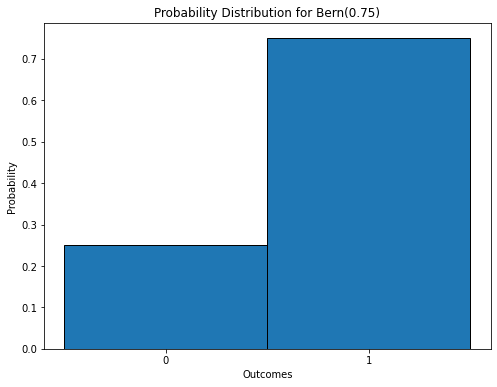

In [262]:
# display the theoretical distribution

X.display()

### Part B:  Your turn!

Now you must create a class for binomial random variables along the lines of the Bernoulli. In addition to
all the local variables created for the Bernoulli, you should also include a parameter for `N` (the number
of trials). 

In [263]:
class Binomial:
    
    def __init__(self,N, p):
        self.p = p
        self.R = [0,1]  
        self.f = [1-p,p]
        self.F = [1-p,1]
        self.mu = p
        self.var = p * (1-p)
        self.stdev = (self.var)**0.5
    
    def seed(self,k):
        seed(k)

    def rvs(self,size=None):
        pass                      # your code here
           
            
    def display(self,figsize=(8,6)):
        plt.figure(figsize=figsize)
        plt.bar(self.R,self.f,width=1.0,edgecolor='black')
        plt.ylabel("Probability")
        plt.xlabel("Outcomes")
        if (self.R[-1] - self.R[0] < 30):
            ticks = range(self.R[0],self.R[-1]+1)
            plt.xticks(ticks, ticks)  
        plt.title("Probability Distribution for Bern("+str(self.p)+")")
        plt.show()

# UNCOMMENT TO TEST

Y = Binomial(8,0.25)       # X ~ B(8,0.25)

Now let's test it!   For each of these test the appropriate value as above

In [264]:
#  should be:  [0.1001129150390625, ....,  1.52587890625e-05]

Y.f

[0.75, 0.25]

In [265]:
# should be  [0.9999847412109375, 1.0]

Y.F[-2:]

[0.75, 1]

In [266]:
# should be 2.0

Y.mu

0.25

In [267]:
# should be 3

Y.seed(0)
Y.rvs()

In [268]:
# should be [3, 3, 2, 1, 2, 2, 3, 1, 2, 2]

Y.seed(0)
Y.rvs(10)

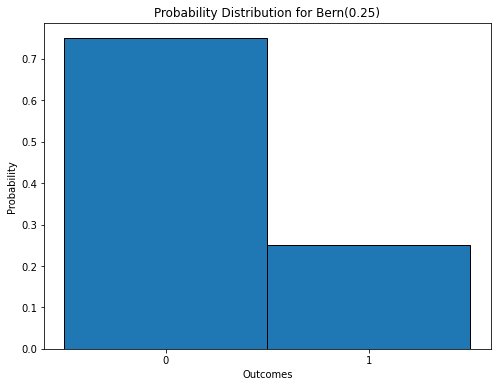

In [269]:
Y.display()

### Part C

Now, generate $10^5$ random numbers from the distribution and display them using `show_distribution`. 

### Part D

Now you must determine by experiment (over $10^5$ trials) the expected value for `X~Binomial(8,0.25)` and calculate the percentage error (from HW 05) from the analytical value `Y.mu`.  Round the percentage error to 4 decimal places as usual. 

The value you determine from experiment would be the "observed value" and the analytical value would be the "expected value." 

It should be around 0.0012. 

In [270]:
num_trials = 10**5

seed(0)



### Part E

Now you must determine by experiment (over $10^5$ trials) the standard deviation for `X~Binomial(8,0.25)` and calculate the percentage error (from HW 05) from the analytical value `Y.stdev`.  Round the percentage error to 4 decimal places as usual. 

The value you determine from experiment would be the "observed value" and the analytical value would be the "expected value."

NOTE: You MUST calculate the standard deviation yourself and may not use any statistical or random number libraries. 
Use the analytical value `Y.mu` for the expected value and perform the calculation as shown in lecture. 

In [271]:
num_trials = 10**5

seed(0)



## Problem 10: What is the best strategy for the game of Twenty-One?
Now suppose we want to actually figure out the right way to gamble, using random variables and distributions.  

We will play a version of blackjack called Twenty-One and figure out the best strategy for the game.

### Twenty One
This game is similar to the famous card game blackjack. We will play a one-player version of the game using a single die.  The game is played for some number `num_trials` of rounds (we will use `num_trials` = $10^5$), at the end of which the player wins points. The player accumulates points during the whole game, and the objective is, of course, to end up with the maximum number of points. 

The objective in each round of the game is to score as close to 21 as possible by rolling a die as many times as you wish and adding all the numbers that appear. When a player's total exceeds 21, he is 'busted' and gets 0 points. If the player chooses to stop rolling before he exceeds 21, then he wins whatever his total is at that point. So for example, if a player rolls 5, 2, 4, and then 6, his total at that point is 17, and he has to decide whether it is worth trying again: he will be busted if he gets 5 or more (since 17+5=22), but will get a better total if he gets 4 or less.  

There are many variations on this game, some involving multiple players, or a "banker" or cards or different numbers of dice, or alcohol..... <a href="https://www.youtube.com/watch?v=zuZqw12MrVI">here</a> is a short YT video explaining the basic game (using cards to count points). 

A computer can play this game with a suitable strategy. For this problem, we will consider a strategy to be simply an integer K which is the value at which you stop rolling (thinking that you are close enough to 21). The number K is fixed for the entire game. For example, if you set K = 19, then in every round, you will keep rolling if your sum to that point is less than 19; if you get a num &ge; 19 you stop. Clearly, any good strategy will be a number at least 15, since 15+6=21 and if you roll again at 15, you will never bust. But we will try all possible strategies. 

### To Do

You should write a function <code>playRound(K)</code> which rolls a single die until you reach or exceed K or get busted, and either return your score (if you reached or exceeded K), or 0 (if you were busted). Then write a function <code>playGame()</code> which calls <code>playRound(K)</code> for N = 10,000 times for each K and returns an array of 21 numbers giving the average payoff for each K = 1, ..., 21.

Your task is to answer the following questions: 

(A) For each K = 1 .. 21, what is the average payoff per round for a game played with this strategy?

(B) What is the best strategy for the game, meaning what value of K wins the most points on average?

Print out the values and an appropriate bar chart for the first question, and simply print out the answer to the second question using a `print(...)` function. You must calculate the answer in Python, not by observation of the graph. 


Note: To exercise your Python coding skills, you might try to do this using OOP, as in the previous problem.
Not required, but good practice!

In [272]:
def playRound(k):
    
    handamount = 0
    i = k
    
    while i != 0:
        
        handamount += randint(1, 7)
        
        if (handamount >= k and handamount <= 21):
            i = 0
            
        elif (handamount > 21):
            return 0
            
    
    
    return handamount
 

print(playRound(15))

16
